## Bank Marketing Data Analysis

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 21 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 21 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

#### Importing Libraries

In [23]:
#import libraries
import seaborn as sns
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

In [24]:
# loading csv data to pandad dataframe
bank_data = pd.read_csv( "data/bank-additional-full.csv", sep=";")
print(bank_data.info())
print(bank_data.shape)
bank_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Checking Columns

In [21]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Conducting EDA on data

In [22]:
def examine_data_frame( df):
    for name in df.columns:
        print("----------")
        print(df[ name].dtype)
        if df[name].dtype is np.dtype( 'O'):
            print(df[name].value_counts())
            print("Name: ", name)
        else:
            print(df[ name].describe())

examine_data_frame(bank_data)

----------
int64
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
----------
object
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Name:  job
----------
object
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Name:  marital
----------
object
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Name:  education
----------
object
no         3

#### Checking for missing values

In [25]:
# Check missing values
bank_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no missing values in columns

### Plot Univariate analysis

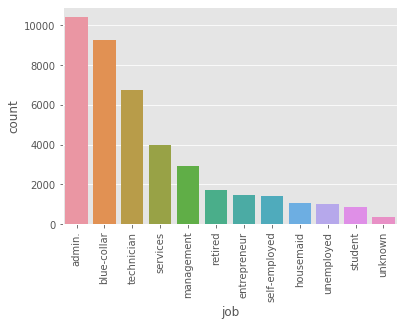

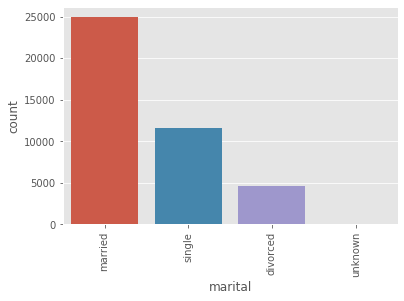

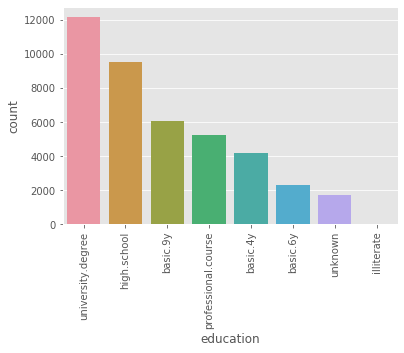

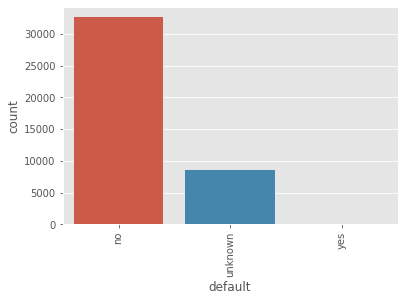

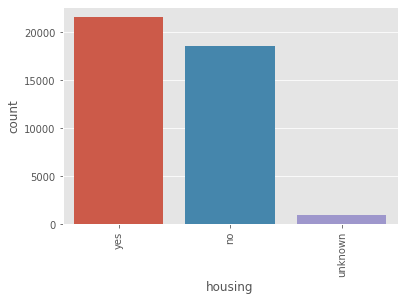

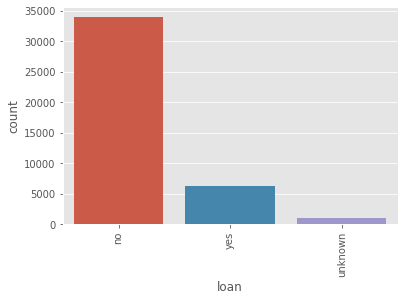

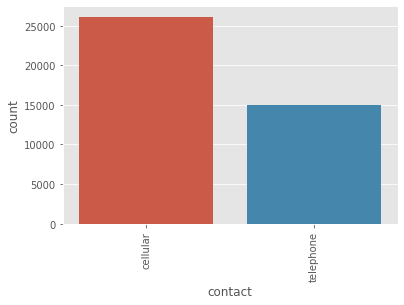

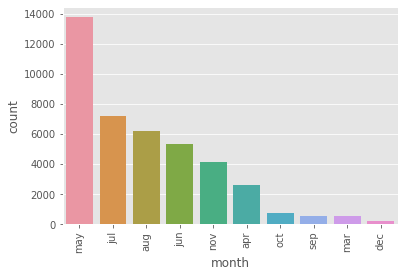

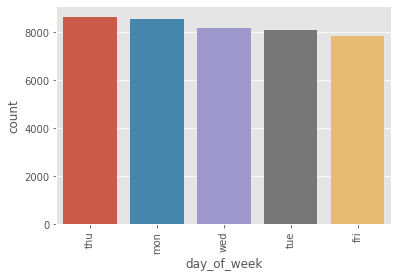

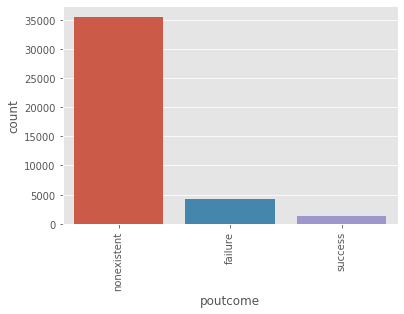

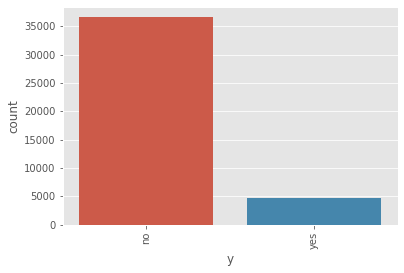

In [30]:
#Count plot of all catagorical data
def plot_catagorical(df):
    for feature in df.dtypes[df.dtypes == 'object'].index:
        sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
        plt.xticks(rotation=90)
        plt.show()
plot_catagorical(bank_data)

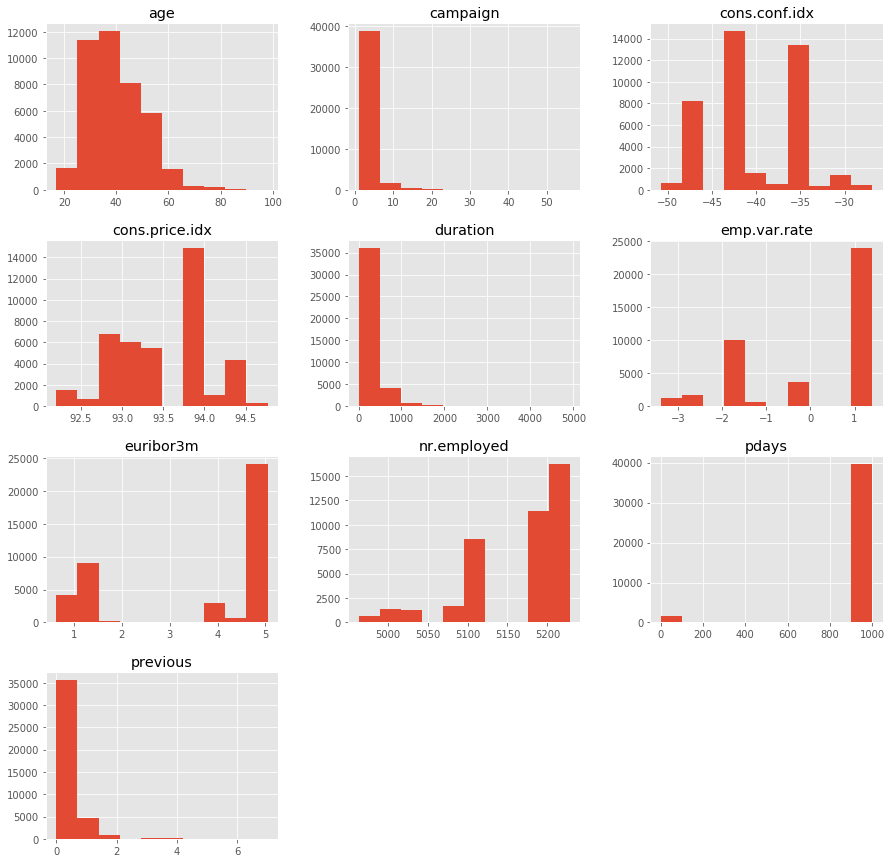

In [31]:
#plot histogram of all numerical data
def plot_numerical(df):
    df.hist(figsize=(15,15))
    plt.show()
plot_numerical(bank_data)

### Handling Outliers 

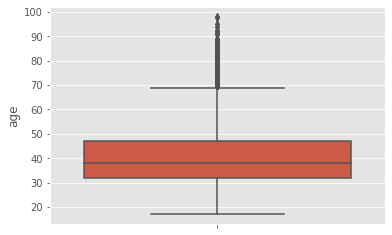

In [32]:
sns.boxplot(y=bank_data["age"])
plt.show()

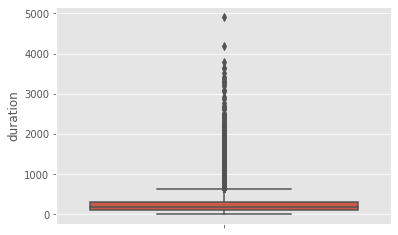

In [34]:
sns.boxplot(y=bank_data["duration"])
plt.show()

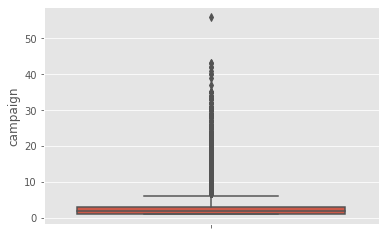

In [35]:
sns.boxplot(y=bank_data["campaign"])
plt.show()

## Preproccesing Data

### Handling invalid data

In [37]:
#dropping unknown values in job aatribute
bank_data = bank_data[bank_data.job != 'unknown']

#dropping unknown values in education attribute
bank_data = bank_data[bank_data.education != 'unknown']

#dropping unknown values in load attribute
bank_data = bank_data[bank_data.loan != 'unknown']

#dropping unknown values in housing attribute
bank_data = bank_data[bank_data.housing != 'unknown']

#dropping unknown values in default attribute
bank_data = bank_data[bank_data.default != 'unknown']

#dropping unknown values in marital attribute
bank_data = bank_data[bank_data.marital != 'unknown']



In [38]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
age               30488 non-null int64
job               30488 non-null object
marital           30488 non-null object
education         30488 non-null object
default           30488 non-null object
housing           30488 non-null object
loan              30488 non-null object
contact           30488 non-null object
month             30488 non-null object
day_of_week       30488 non-null object
duration          30488 non-null int64
campaign          30488 non-null int64
pdays             30488 non-null int64
previous          30488 non-null int64
poutcome          30488 non-null object
emp.var.rate      30488 non-null float64
cons.price.idx    30488 non-null float64
cons.conf.idx     30488 non-null float64
euribor3m         30488 non-null float64
nr.employed       30488 non-null float64
y                 30488 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [39]:
#percentage distribution of deposit
bank_data['y'].value_counts()/bank_data['y'].count()

no     0.873426
yes    0.126574
Name: y, dtype: float64

In [40]:
bank_data['y'].value_counts()

no     26629
yes     3859
Name: y, dtype: int64

### Balancing Data

In [42]:
# Separate majority and minority classes
deposit_no = bank_data[bank_data.y=='no']
deposit_yes= bank_data[bank_data.y=='yes']

In [45]:
#up sample deposit yes
from sklearn.utils import resample
deposit_yes_upsampled = resample(deposit_yes, replace=True, n_samples=26629, random_state=0)

In [49]:
upsampled_bank_data = pd.concat([deposit_no, deposit_yes_upsampled])

In [50]:
upsampled_bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


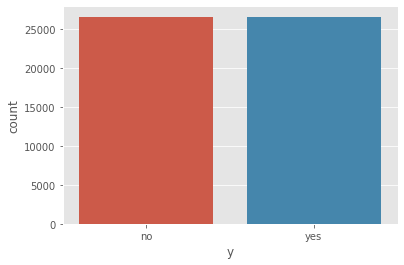

In [51]:
sns_plot =sns.countplot(x='y',data=upsampled_bank_data)
plt.show()

In [54]:
upsampled_bank_data['y'].value_counts()

no     26629
yes    26629
Name: y, dtype: int64

In [55]:
data_copy = upsampled_bank_data.copy()

### Handling Categorical Variables

#### Handling nominal variables

In [59]:
upsampled_bank_data['education'].value_counts()

university.degree      19397
high.school            13342
professional.course     7455
basic.9y                6495
basic.4y                4378
basic.6y                2163
illiterate                28
Name: education, dtype: int64

In [60]:
#education encoding with integer encoding 
level_mapping = {'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y':3, 'high.school':4,'professional.course':5,
                 'university.degree': 6}
upsampled_bank_data['education'] = upsampled_bank_data['education'].replace(level_mapping)

In [65]:
# encoding the binary feature
encoder = LabelEncoder()
upsampled_bank_data['y'] = encoder.fit_transform(upsampled_bank_data['y'])
upsampled_bank_data['default'] = encoder.fit_transform(upsampled_bank_data['default'])
upsampled_bank_data['housing'] = encoder.fit_transform(upsampled_bank_data['housing'])
upsampled_bank_data['loan'] = encoder.fit_transform(upsampled_bank_data['loan'])
upsampled_bank_data['contact'] = encoder.fit_transform(upsampled_bank_data['contact'])

#### Handling Ordinal Variables

In [66]:

# transform data
upsampled_bank_data = pd.get_dummies(upsampled_bank_data, columns=['job','marital','month','day_of_week','poutcome'],
                                     drop_first=True)

In [67]:
upsampled_bank_data.head()

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,1,261,1,999,0,...,1,0,0,0,1,0,0,0,1,0
2,37,4,0,1,0,1,226,1,999,0,...,1,0,0,0,1,0,0,0,1,0
3,40,2,0,0,0,1,151,1,999,0,...,1,0,0,0,1,0,0,0,1,0
4,56,4,0,0,1,1,307,1,999,0,...,1,0,0,0,1,0,0,0,1,0
6,59,5,0,0,0,1,139,1,999,0,...,1,0,0,0,1,0,0,0,1,0


In [68]:
upsampled_bank_data.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### Rescale all numerical columns

In [73]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
columns_to_scale= ['age','campaign','cons.conf.idx','cons.price.idx','duration','emp.var.rate','euribor3m','nr.employed',
                   'pdays','previous']
upsampled_bank_data[columns_to_scale]  = scaler.fit_transform(upsampled_bank_data[columns_to_scale])


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [74]:
upsampled_bank_data.head()

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.500000,1,0,0,0,1,0.053070,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0
2,0.256410,4,0,1,0,1,0.045954,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0
3,0.294872,2,0,0,0,1,0.030704,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0
4,0.500000,4,0,0,1,1,0.062424,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0
6,0.538462,5,0,0,0,1,0.028264,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0
